# **CBM414 Procesamiento digital de señales Biomédicas, Laboratorio 06**
## Profesor: David Ortiz
## Alumno: Maximiliano Antonio Gaete Pizarro

## Fecha de entrega: 27 de noviembre

El objetivo de esta práctica es desarrollar y documentar códigos útiles para el filtrado de señales, que serán aplicables en el trabajo final del curso. Por ello, es fundamental que el código esté bien documentado y estructurado, permitiendo una comprensión clara de cada etapa del proceso de filtrado.

### Entrega del Laboratorio
- La entrega puede ser realizada en parejas.
- El formato de entrega puede ser:
  - Un Jupyter Notebook, donde se muestren tanto el código como los resultados.
  - Un informe en PDF, generado en Word o LaTeX.
- No olviden las unidades, ni los nombres de los ejes.
  
Si optan por entregar el laboratorio en formato de informe (Word o LaTeX), asegúrense de incluir el código empleado en el desarrollo de cada ejercicio. Además, se mandendran las bonificaciones de inglés y latex si el informe es entregado en formado PDF.


### Punto 1: Análisis Espectral de Filtros FIR e IIR Pasa-Bajas

En este punto, se realizará un análisis comparativo de los filtros FIR e IIR, visualizando la respuesta en frecuencia (magnitud y fase) de ambos en una única gráfica. Para esto, se debe utilizar un `subplot` donde la magnitud esté en la parte superior y la fase en la parte inferior, identificando adecuadamente los ejes con unidades y frecuencia de corte. **Nota: Para efectos de este punto, NO utilices dB como unidad en la magnitud**

1.  **(0.5 Punto) Diseño y Cálculo de la Función de Transferencia**
   Obtener un filtro pasa-bajas FIR utilizando una ventana cuadrada y un filtro IIR Butterworth. Usa los siguientes parámetros de diseño:

  - Frecuencia de corte:  $f_c = 5$kHz
  - Frecuencia de muestreo: $f_s = 20$kHz
  - Orden del filtro FIR: 10
  - Orden del filtro IIR Butterworth: 4
     
  Implementar cada filtro en Python y mostrar la función de transferencia $H(z)$ de cada uno. **Nota:** la función de transferencia debe ser explícita, es decir, contener las variables $z$.

2. **(0.5 Punto) Gráficas de Magnitud y Fase Comparativas**
  Graficar la respuesta en frecuencia (magnitud y fase) de ambos filtros, en dos configuraciones:
     - Frecuencia normalizada (entre 0 y $\pi$).
     - Frecuencia en Hz (0 hasta $f_s/2$).

  Brevemente describa que diferencias observadas.

**Ayuda:** utiliza las funciones `signal.firwin`, `signal.butter` y `signal.freqz` de la librería `scipy.signal`.


a) Filtro FIR pasa-bajas utilizando una ventana cuadrada:

Normalización de la frecuencia de corte:

La frecuencia de corte debe ser normalizada con respecto a la frecuencia de Nyquist (
𝑓𝑁 = 𝑓𝑠 / 2):

𝑓𝑁 = 𝑓𝑠 / 2 = 10 kHz

Frecuencia de corte normalizada:
𝑓𝑐 / 𝑓𝑁 = 5 / 10 = 0.5

In [254]:
from scipy import signal

N_FIR = 10 #order of the filter

num_fir = signal.firwin(numtaps=N_FIR+1, cutoff=0.5, window='boxcar')
den_fir = [1] 

In [255]:
num_fir

array([ 6.05303122e-02, -1.85320633e-17, -1.00883854e-01,  1.85320633e-17,
        3.02651561e-01,  4.75403961e-01,  3.02651561e-01,  1.85320633e-17,
       -1.00883854e-01, -1.85320633e-17,  6.05303122e-02])

`numtaps` es el número de coeficientes del filtro (𝑁_FIR + 1).

`cutoff` es la frecuencia de corte normalizada.

`window` es el tipo de ventana (en este caso, 'boxcar' para una ventana rectangular).

### Función de Transferencia del Filtro FIR

La función de transferencia del filtro FIR es:

$$
H_{\text{FIR}}(z) = \sum_{k=0}^{N} b_k z^{-k}
$$

In [256]:
import sympy as sp
from sympy.abc import z
from IPython.display import display, Markdown

In [257]:
# Crear la suma para el numerador
H_fir = sum(num_fir[k] * z**(-k) for k in range(len(num_fir)))

# Convertir a LaTeX
H_fir_latex = sp.latex(H_fir.simplify())

# Mostrar en el notebook
display(Markdown(f"### Función de Transferencia del Filtro FIR\n\nLa función de transferencia es:\n\n$$\nH_{{\\text{{FIR}}}}(z) = {H_fir_latex}\n$$"))

### Función de Transferencia del Filtro FIR

La función de transferencia es:

$$
H_{\text{FIR}}(z) = 0.0605303122372741 - \frac{1.85320632831919 \cdot 10^{-17}}{z} - \frac{0.10088385372879}{z^{2}} + \frac{1.85320632831919 \cdot 10^{-17}}{z^{3}} + \frac{0.30265156118637}{z^{4}} + \frac{0.475403960610291}{z^{5}} + \frac{0.30265156118637}{z^{6}} + \frac{1.85320632831919 \cdot 10^{-17}}{z^{7}} - \frac{0.10088385372879}{z^{8}} - \frac{1.85320632831919 \cdot 10^{-17}}{z^{9}} + \frac{0.0605303122372741}{z^{10}}
$$

b) Filtro IIR Butterworth pasa-bajas:

Diseño del filtro utilizando `signal.butter`:

In [258]:
N_IIR = 4 #order of the filter
num_iir, den_iir = signal.butter(N_IIR, 0.5, btype='low', analog=False)

N_IIR es el orden del filtro.  

0.5 es la frecuencia de corte normalizada.  

`btype='low'` especifica un filtro pasa-bajas.  

`analog=False` indica que es un filtro digital.

### Función de Transferencia del Filtro IIR

La función de transferencia del filtro IIR es:

$$
H_{\text{IIR}}(z) = \frac{\sum_{k=0}^{M} b_k z^{-k}}{\sum_{k=0}^{N} a_k z^{-k}}
$$

In [259]:
# Crear las sumas para el numerador y denominador
numerator = sum(num_iir[k] * z**(-k) for k in range(len(num_iir)))
denominator = sum(den_iir[k] * z**(-k) for k in range(len(den_iir)))

# Convertir a LaTeX
numerator_latex = sp.latex(numerator.simplify())
denominator_latex = sp.latex(denominator.simplify())

# Función de transferencia
H_iir_latex = f"\\frac{{{numerator_latex}}}{{{denominator_latex}}}"

# Mostrar en el notebook
display(Markdown(f"### Función de Transferencia del Filtro IIR\n\nLa función de transferencia es:\n\n$$\nH_{{\\text{{IIR}}}}(z) = {H_iir_latex}\n$$"))

### Función de Transferencia del Filtro IIR

La función de transferencia es:

$$
H_{\text{IIR}}(z) = \frac{0.0939808514337944 + \frac{0.375923405735178}{z} + \frac{0.563885108602767}{z^{2}} + \frac{0.375923405735178}{z^{3}} + \frac{0.0939808514337944}{z^{4}}}{1.0 - \frac{2.4980018054066 \cdot 10^{-16}}{z} + \frac{0.486028822068269}{z^{2}} - \frac{6.63518679012922 \cdot 10^{-17}}{z^{3}} + \frac{0.0176648008724419}{z^{4}}}
$$

2. Gráficas de Magnitud y Fase Comparativas
Para comparar las respuestas en frecuencia de ambos filtros:

a) Cálculo de la respuesta en frecuencia utilizando `signal.freqz`:

In [260]:
import numpy as np
import matplotlib.pyplot as plt

# Respuesta en frecuencia del filtro FIR
w_fir, h_fir = signal.freqz(num_fir, den_fir)

# Respuesta en frecuencia del filtro IIR
w_iir, h_iir = signal.freqz(num_iir, den_iir)

b) Conversión de frecuencias:

Frecuencia normalizada (0 a π): Utiliza directamente w_fir y w_iir.

Frecuencia en Hz (0 a fs/2):

In [261]:
f_s = 20000 # Frecuencia de muestreo
f_Nyquist = f_s / 2
freq_fir = w_fir * f_Nyquist / np.pi
freq_iir = w_iir * f_Nyquist / np.pi

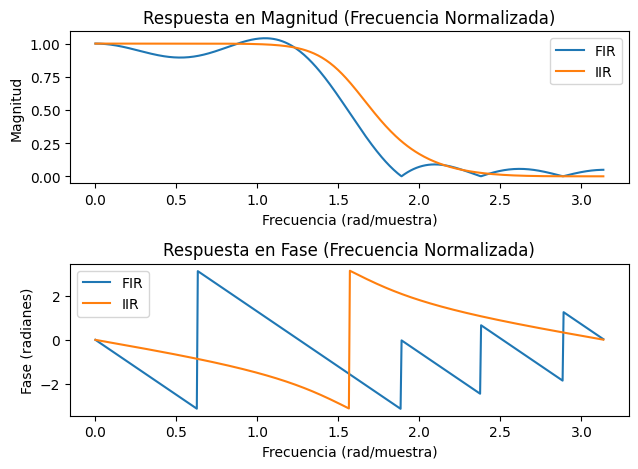

In [262]:
plt.subplot(2, 1, 1)
plt.plot(w_fir, np.abs(h_fir), label='FIR')
plt.plot(w_iir, np.abs(h_iir), label='IIR')
plt.title('Respuesta en Magnitud (Frecuencia Normalizada)')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Magnitud')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(w_fir, np.angle(h_fir), label='FIR')
plt.plot(w_iir, np.angle(h_iir), label='IIR')
plt.title('Respuesta en Fase (Frecuencia Normalizada)')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Fase (radianes)')
plt.legend()
plt.tight_layout()
plt.show()


d) Observaciones:

Al comparar las respuestas:

**Filtro FIR:**

- Tiene una respuesta en fase lineal, lo que preserva la forma de la señal en el tiempo.
- Requiere un orden más alto para lograr una pendiente de corte pronunciada.

**Filtro IIR:**

- Presenta una transición más abrupta en la banda de paso y de corte.
- La fase no es lineal, lo que puede distorsionar señales en ciertas aplicaciones.

### Punto 2: Diseño de Filtros FIR e IIR para Diferentes Tipos de Respuesta

En este punto, se diseñarán filtros FIR e IIR de diferentes tipos de respuesta utilizando los mismos parámetros de diseño del punto anterior. El objetivo es implementar y comparar las respuestas de filtros pasa-bajas, pasa-altas, pasa-banda y rechaza-banda. **Nota: Para efectos de este punto, NO utilices dB como unidad en la magnitud**

**Parámetros de Diseño**

Utilizar los siguientes parámetros para el diseño de todos los filtros:

- Frecuencia de muestreo: $f_s = 20$kHz
- Orden del filtro FIR: 10
- Orden del filtro IIR Butterworth: 4

**Diseño de Filtros para Diferentes Respuestas**

Obtener un filtro (tanto FIR como IIR) para cada uno de los siguientes tipos de respuesta:

1. **Pasa-bajas** con frecuencia de corte $f_c = 5$kHz
2. **Pasa-altas** con frecuencia de corte $f_c = 5$kHz
3. **Pasa-banda** con frecuencias de corte $ f_{c1} = 3.5$kHz y $f_{c2} = 5.5kHz$
4. **Rechaza-banda** con frecuencias de corte $ f_{c1} = 3.5$kHz y $f_{c2} = 5.5kHz$

Implementar cada filtro en Python utilizando `signal.firwin` para FIR y `signal.butter` para IIR.

**(2 Puntos) Gráficas de Magnitud y Fase Comparativas**

Para cada tipo de filtro diseñado (pasa-bajas, pasa-altas, pasa-banda y rechaza-banda), graficar la magnitud y fase de ambos filtros (FIR e IIR) superpuestos en función de la **frecuencia en Hz**. Brevemente describa las diferencias encontradas.


### Filtro pasa bajas 5kHz

In [263]:
fs = 20000  # Frecuencia de muestreo en Hz
orden_fir = 10
orden_iir = 4

In [264]:
fc = 5000  # Frecuencia de corte en Hz
fc_norm = fc / (fs / 2)  # Normalización de la frecuencia

# Diseño del filtro FIR pasa-bajas
b_fir = signal.firwin(numtaps=orden_fir + 1, cutoff=fc_norm, window='hamming')

# Diseño del filtro IIR Butterworth pasa-bajas
b_iir, a_iir = signal.butter(N=orden_iir, Wn=fc_norm, btype='low')

# Cálculo de la respuesta en frecuencia
w_fir, h_fir = signal.freqz(b_fir, worN=8000, fs=fs)
w_iir, h_iir = signal.freqz(b_iir, a_iir, worN=8000, fs=fs)

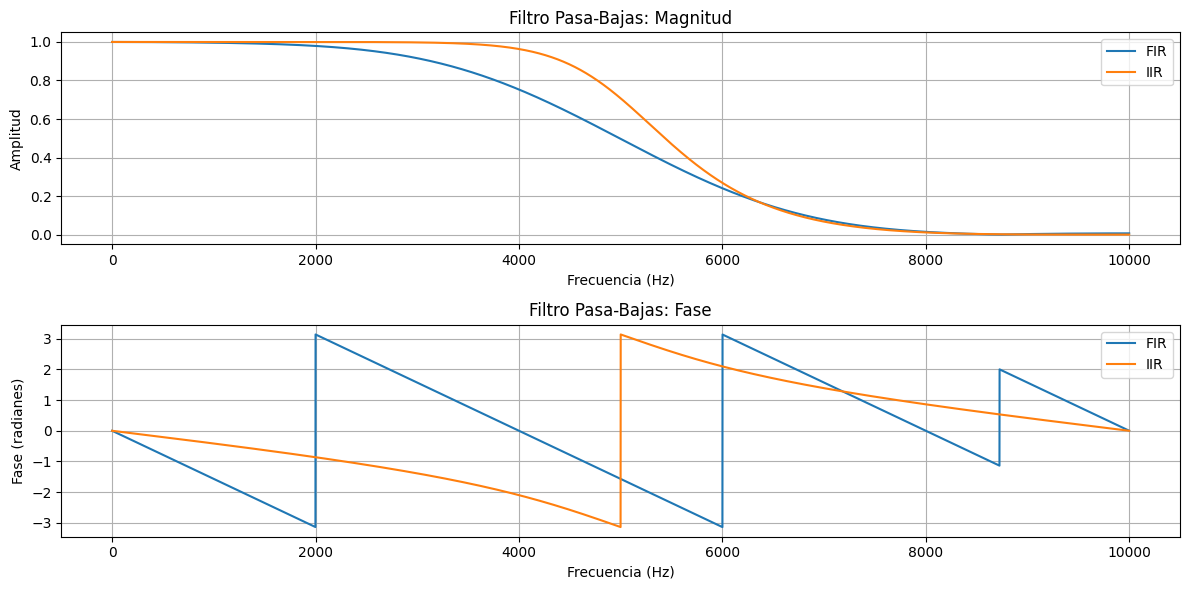

In [265]:
plt.figure(figsize=(12, 6))

# Magnitud
plt.subplot(2, 1, 1)
plt.plot(w_fir, np.abs(h_fir), label='FIR')
plt.plot(w_iir, np.abs(h_iir), label='IIR')
plt.title('Filtro Pasa-Bajas: Magnitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Fase
plt.subplot(2, 1, 2)
plt.plot(w_fir, np.angle(h_fir), label='FIR')
plt.plot(w_iir, np.angle(h_iir), label='IIR')
plt.title('Filtro Pasa-Bajas: Fase')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Observaciones  
En la gráfica de magnitud, observamos que ambos filtros permiten el paso de frecuencias por debajo de 5 kHz y atenúan las frecuencias superiores. El filtro IIR tiene una transición más abrupta debido a su naturaleza recursiva y orden más alto efectivo. En la fase, el filtro FIR muestra una respuesta lineal, mientras que el filtro IIR presenta una fase no lineal.

### Filtro pasa altas 5kHz

In [266]:
# Diseño del filtro FIR pasa-altas
b_fir = signal.firwin(numtaps=orden_fir + 1, cutoff=fc_norm, window='hamming', pass_zero=False)

# Diseño del filtro IIR Butterworth pasa-altas
b_iir, a_iir = signal.butter(N=orden_iir, Wn=fc_norm, btype='high')

# Cálculo de la respuesta en frecuencia
w_fir, h_fir = signal.freqz(b_fir, worN=8000, fs=fs)
w_iir, h_iir = signal.freqz(b_iir, a_iir, worN=8000, fs=fs)

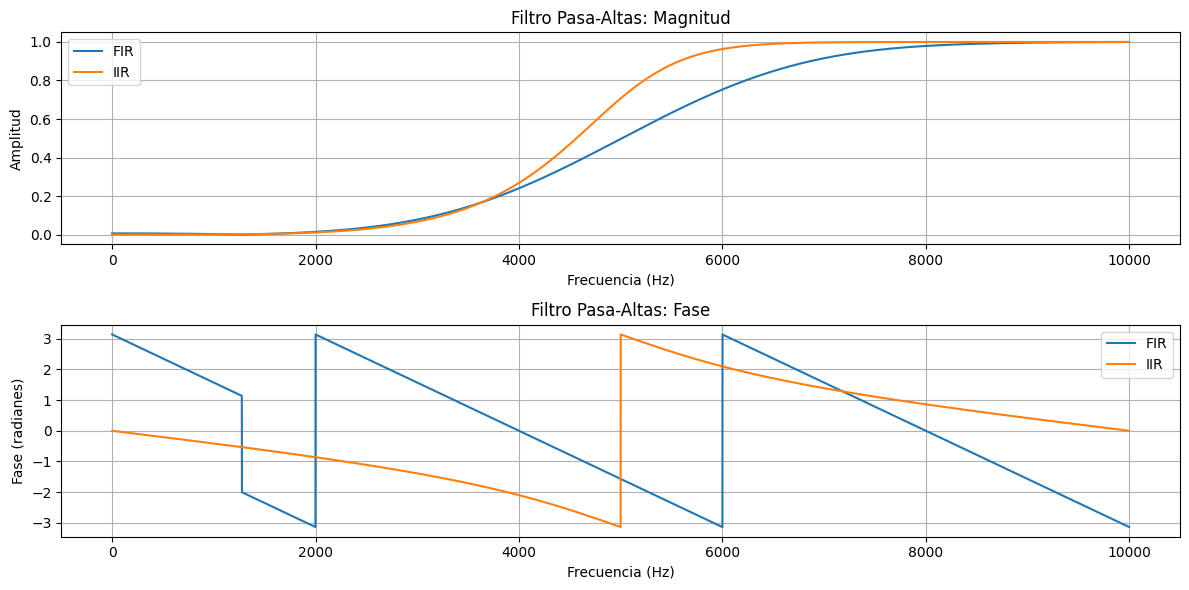

In [267]:
plt.figure(figsize=(12, 6))

# Magnitud
plt.subplot(2, 1, 1)
plt.plot(w_fir, np.abs(h_fir), label='FIR')
plt.plot(w_iir, np.abs(h_iir), label='IIR')
plt.title('Filtro Pasa-Altas: Magnitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Fase
plt.subplot(2, 1, 2)
plt.plot(w_fir, np.angle(h_fir), label='FIR')
plt.plot(w_iir, np.angle(h_iir), label='IIR')
plt.title('Filtro Pasa-Altas: Fase')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Observaciones  
En este caso, ambos filtros permiten el paso de frecuencias por encima de 5 kHz. El filtro IIR nuevamente muestra una transición más abrupta. La respuesta de fase del filtro FIR es más lineal comparada con la del filtro IIR, lo cual es una ventaja en aplicaciones donde la distorsión de fase es crítica.


### Filtro pasa banda 3.5kHz a 5.5kHz

In [268]:
fc1 = 3500
fc2 = 5500
fc_norm = [fc1 / (fs / 2), fc2 / (fs / 2)]

# Diseño del filtro FIR pasa-banda
b_fir = signal.firwin(numtaps=orden_fir + 1, cutoff=fc_norm, window='hamming', pass_zero=False)

# Diseño del filtro IIR Butterworth pasa-banda
b_iir, a_iir = signal.butter(N=orden_iir, Wn=fc_norm, btype='bandpass')

# Cálculo de la respuesta en frecuencia
w_fir, h_fir = signal.freqz(b_fir, worN=8000, fs=fs)
w_iir, h_iir = signal.freqz(b_iir, a_iir, worN=8000, fs=fs)


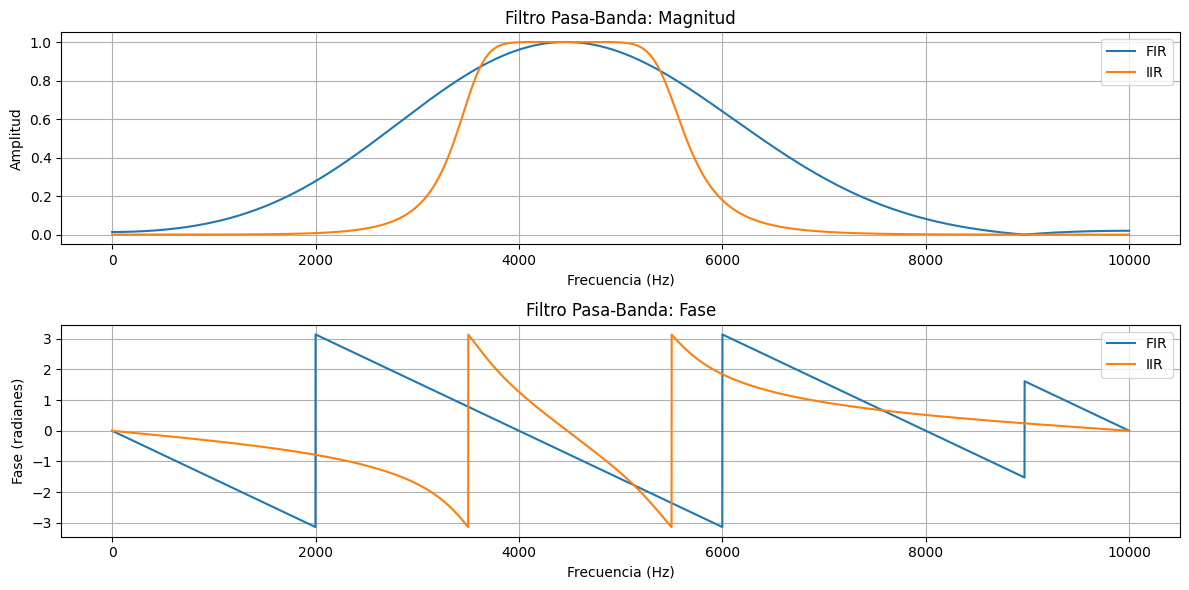

In [269]:
plt.figure(figsize=(12, 6))

# Magnitud
plt.subplot(2, 1, 1)
plt.plot(w_fir, np.abs(h_fir), label='FIR')
plt.plot(w_iir, np.abs(h_iir), label='IIR')
plt.title('Filtro Pasa-Banda: Magnitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Fase
plt.subplot(2, 1, 2)
plt.plot(w_fir, np.angle(h_fir), label='FIR')
plt.plot(w_iir, np.angle(h_iir), label='IIR')
plt.title('Filtro Pasa-Banda: Fase')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Observaciones

Los filtros permiten el paso de frecuencias entre 3.5 kHz y 5.5 kHz. El filtro IIR muestra una banda de paso más definida y transiciones más abruptas. La fase del filtro FIR es más lineal en la banda de paso, mientras que el filtro IIR tiene una variación de fase más pronunciada.



### Filtro rechaza banda 3.5kHz y 5.5kHz

In [270]:
# Diseño del filtro FIR rechaza-banda
b_fir = signal.firwin(numtaps=orden_fir + 1, cutoff=fc_norm, window='hamming')

# Diseño del filtro IIR Butterworth rechaza-banda
b_iir, a_iir = signal.butter(N=orden_iir, Wn=fc_norm, btype='bandstop')

# Cálculo de la respuesta en frecuencia
w_fir, h_fir = signal.freqz(b_fir, worN=8000, fs=fs)
w_iir, h_iir = signal.freqz(b_iir, a_iir, worN=8000, fs=fs)

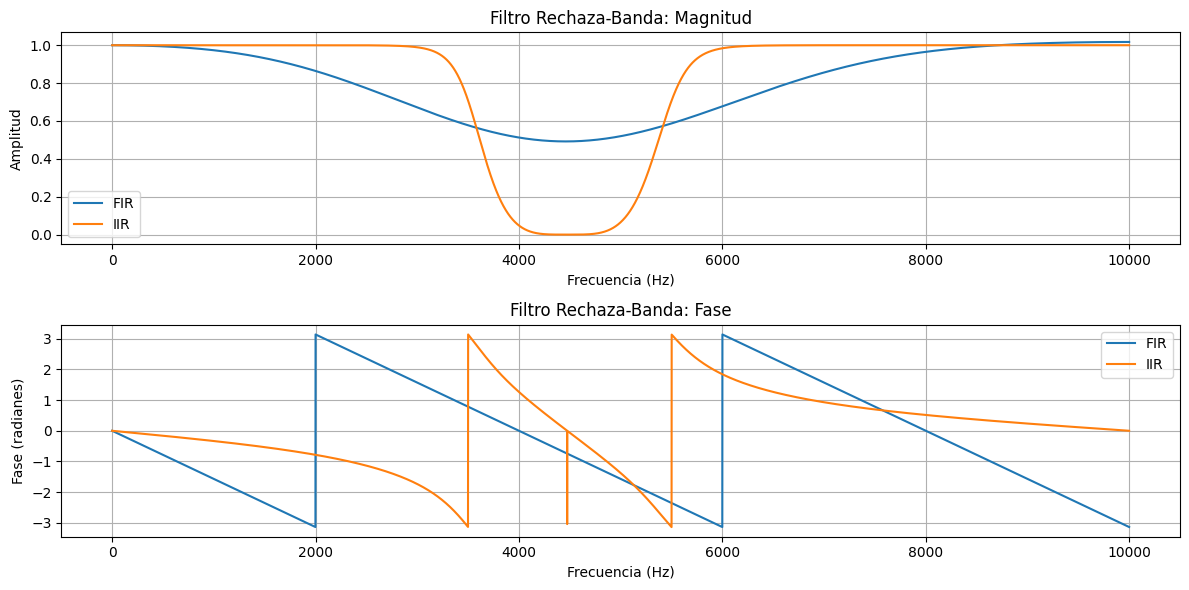

In [271]:
plt.figure(figsize=(12, 6))

# Magnitud
plt.subplot(2, 1, 1)
plt.plot(w_fir, np.abs(h_fir), label='FIR')
plt.plot(w_iir, np.abs(h_iir), label='IIR')
plt.title('Filtro Rechaza-Banda: Magnitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Fase
plt.subplot(2, 1, 2)
plt.plot(w_fir, np.angle(h_fir), label='FIR')
plt.plot(w_iir, np.angle(h_iir), label='IIR')
plt.title('Filtro Rechaza-Banda: Fase')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Observaciones

Los filtros atenúan las frecuencias entre 3.5 kHz y 5.5 kHz. El filtro IIR presenta una mayor atenuación en la banda de rechazo y transiciones más abruptas. La respuesta de fase del filtro FIR es nuevamente más lineal fuera de la banda de rechazo.

### Conclusión General:

Los filtros IIR suelen tener transiciones más abruptas y una mejor selectividad con órdenes más bajos comparados con los FIR.

Los filtros FIR tienen una respuesta de fase más lineal, lo cual es beneficioso para aplicaciones donde la distorsión de fase es crítica.

La elección entre FIR e IIR dependerá de los requisitos específicos de la aplicación, considerando trade-offs entre complejidad computacional, selectividad y distorsión de fase.

Orden del Filtro: Los filtros IIR suelen alcanzar una pendiente más pronunciada con un orden menor en comparación con los filtros FIR.

Respuesta de Fase: Los filtros FIR pueden diseñarse para tener una fase lineal, lo cual es útil en aplicaciones donde la distorsión de fase debe minimizarse.

Magnitud: Los filtros IIR pueden presentar una mayor eficiencia en términos de recursos computacionales y una respuesta en magnitud más ajustada con órdenes más bajos.

### Punto 3: Comparación de Filtros FIR con Diferentes Ventanas y Órdenes

En este punto, se realizará una comparación entre filtros FIR e IIR de rechazo de banda. Se diseñará un filtro IIR Butterworth de 4º orden y filtros FIR de diferentes órdenes y ventanas para observar cómo cambia la respuesta en frecuencia. **Nota: Para efectos de este punto, NO utilices dB como unidad en la magnitud**

**Diseño de Filtros FIR e IIR**
Obtener un filtro IIR Butterworth de 4º orden de rechazo de banda con las siguientes frecuencias de corte:
  - Frecuencias de corte: $ f_{c1} = 5$kHz y $f_{c2} = 5.5kHz$
  - Frecuencia de muestreo: $f_s = 20$kHz

**(2 Puntos) Gráficas de Magnitud y Fase Comparativas**
Para cada ventana (Boxcar y Hanning), graficar la magnitud y fase de los filtros FIR de orden 20, 100 y 200, superpuestos con la magnitud y fase del filtro IIR. Brevemente describa las diferencias observadas


In [272]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz, firwin

# Parámetros del filtro
fc1 = 5000     # Frecuencia de corte inferior en Hz
fc2 = 5500     # Frecuencia de corte superior en Hz
fs = 20000     # Frecuencia de muestreo en Hz

# Normalización de frecuencias
nyq = fs / 2
low = fc1 / nyq
high = fc2 / nyq

# Diseño del filtro IIR Butterworth de 4º orden
b_iir, a_iir = butter(N=4, Wn=[low, high], btype='bandstop')

# Frecuencias para la respuesta en frecuencia
w, h_iir = freqz(b_iir, a_iir, worN=8000, fs=fs)


In [273]:
# Órdenes de los filtros FIR
ordenes = [20, 100, 200]
ventanas = ['boxcar', 'hann']
filtros_fir = {}

for ventana in ventanas:
    filtros_fir[ventana] = {}
    for orden in ordenes:
        num_taps = orden + 1  # Número de coeficientes
        taps = firwin(num_taps, cutoff=[fc1, fc2], window=ventana, pass_zero='bandstop', fs=fs)
        filtros_fir[ventana][orden] = taps

In [274]:
import plotly.graph_objects as go

# Crear la figura
fig = go.Figure()

# Añadir la respuesta en magnitud del filtro IIR
fig.add_trace(go.Scatter(x=w, y=np.abs(h_iir), mode='lines', name='IIR Butterworth 4º orden'))

# Añadir la respuesta en magnitud de los filtros FIR
for ventana in ventanas:
    for orden in ordenes:
        taps = filtros_fir[ventana][orden]
        w_fir, h_fir = freqz(taps, worN=8000, fs=fs)
        fig.add_trace(go.Scatter(x=w_fir, y=np.abs(h_fir), mode='lines', name=f'FIR {ventana.capitalize()}, Orden {orden}'))

# Configurar el layout para la magnitud
fig.update_layout(
    title='Respuesta en Magnitud de los Filtros',
    xaxis_title='Frecuencia (Hz)',
    yaxis_title='Magnitud',
    legend_title='Filtros',
    height=600
)

# Mostrar la figura
fig.show()

# Crear la figura para la fase
fig_phase = go.Figure()

# Añadir la respuesta en fase del filtro IIR
fig_phase.add_trace(go.Scatter(x=w, y=np.angle(h_iir), mode='lines', name='IIR Butterworth 4º orden'))

# Añadir la respuesta en fase de los filtros FIR
for ventana in ventanas:
    for orden in ordenes:
        taps = filtros_fir[ventana][orden]
        w_fir, h_fir = freqz(taps, worN=8000, fs=fs)
        fig_phase.add_trace(go.Scatter(x=w_fir, y=np.angle(h_fir), mode='lines', name=f'FIR {ventana.capitalize()}, Orden {orden}'))

# Configurar el layout para la fase
fig_phase.update_layout(
    title='Respuesta en Fase de los Filtros',
    xaxis_title='Frecuencia (Hz)',
    yaxis_title='Fase (radianes)',
    legend_title='Filtros',
    height=600
)

# Mostrar la figura
fig_phase.show()

### Magnitud:

Los filtros FIR de mayor orden (100 y 200) presentan transiciones más abruptas y una mejor definición en la banda de rechazo en comparación con el filtro de orden 20.
La ventana Hanning ofrece una mejor atenuación en las bandas de rechazo y transiciones más suaves en comparación con la ventana Boxcar.
El filtro IIR muestra una transición más pronunciada en la banda de rechazo, pero puede introducir distorsiones en la fase.
### Fase:

Los filtros FIR tienen una respuesta en fase más lineal, especialmente con órdenes más altos, lo cual es beneficioso en aplicaciones donde la distorsión de fase es crítica.
El filtro IIR presenta una respuesta en fase no lineal, lo que puede afectar señales sensibles a cambios de fase.



En resumen, los filtros FIR con ventanas adecuadas y órdenes más altos pueden aproximarse al rendimiento del filtro IIR en términos de magnitud, pero con la ventaja adicional de una respuesta en fase más lineal. La elección entre FIR e IIR dependerá de las especificaciones de la aplicación y las restricciones de diseño.

### Punto 4: Aplicación de Filtros FIR e IIR en Señales con Ruido

En este punto, se pondrán en práctica los conceptos aprendidos diseñando y aplicando filtros para limpiar una señal contaminada. **NOTA: el filtrado se debe hace utilizando el teorema de la convolución (producto en frecuencia)**

**Generación de Señal con Ruido y Frecuencia Alta Contaminante**
   - Generar una señal senoidal de baja frecuencia (ej., $f_{señal} = 50$Hz) con una frecuencia de muestreo de $f_s = 1000$Hz.
   - Agregar a la señal un componente de frecuencia alta, por ejemplo, una señal senoidal de 200Hz.
   - Agregar ruido aleatorio (de amplitud baja) para simular ruido de alta y baja frecuencia en la señal.

**Diseño de Filtros para Limpiar la Señal Contaminada**
   - **Filtro de Rechazo de Banda**: Diseñar un filtro FIR y un IIR de rechazo de banda para eliminar la señal de alta frecuencia (200 Hz).
   - **Filtro Pasa-Banda**: Diseñar un filtro FIR y un IIR pasa-banda para eliminar el ruido de altas y bajas frecuencias, conservando solo el rango de la señal original (en torno a 50 Hz).

1. **(1 Punto) Análisis del espectro**

  Graficar el espectro (magnitud y fase) de la señal contaminada y de los filtros diseñados (son 4 filtros).

1. **(1 Punto) Aplicación y Comparación de Resultados**

    **Nota: aquí si debes utilizar dB en las gráficas del espectro**

   Aplicar los filtros diseñados a la señal contaminada. Graficar el espectro y comparar la señal original, la señal contaminada y las señales filtradas (una gráfica para el filtro de rechazo y de banda juntos). Son dos gráficas.



In [275]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, iirnotch, iirfilter, freqz
from scipy.fft import fft, ifft, fftfreq

# Frecuencia de muestreo y vector de tiempo
fs = 1000  # Frecuencia de muestreo en Hz
t = np.arange(0, 1, 1/fs)  # Vector de tiempo de 1 segundo

# Frecuencias de las señales
f_signal = 50   # Frecuencia de la señal original en Hz
f_interf = 200  # Frecuencia de la señal interferente en Hz

# Señal original de baja frecuencia
signal = np.sin(2 * np.pi * f_signal * t)

# Señal interferente de alta frecuencia
interference = np.sin(2 * np.pi * f_interf * t)

# Ruido aleatorio de baja amplitud
noise = 0.5 * np.random.randn(len(t))

# Señal contaminada
contaminated_signal = signal + interference + noise


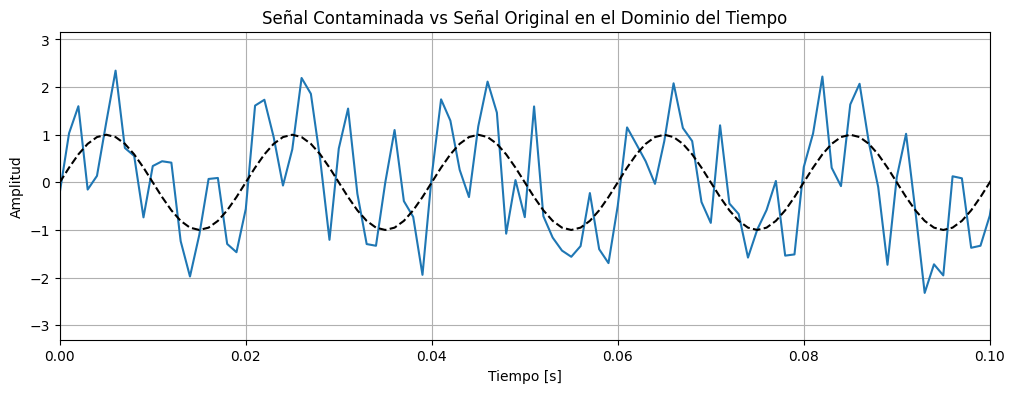

In [276]:
plt.figure(figsize=(12, 4))
plt.plot(t, contaminated_signal)
plt.plot(t, signal, 'k--', label='Señal Original')
plt.title('Señal Contaminada vs Señal Original en el Dominio del Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0, 0.1)  # Mostrar solo los primeros 100 ms para mayor claridad
plt.grid(True)
plt.show()

In [277]:
# Cálculo de la Transformada de Fourier
N = len(contaminated_signal)
freq = fftfreq(N, d=1/fs)
contaminated_signal_fft = fft(contaminated_signal)

# Magnitud y Fase
magnitude = np.abs(contaminated_signal_fft)
phase = np.angle(contaminated_signal_fft)

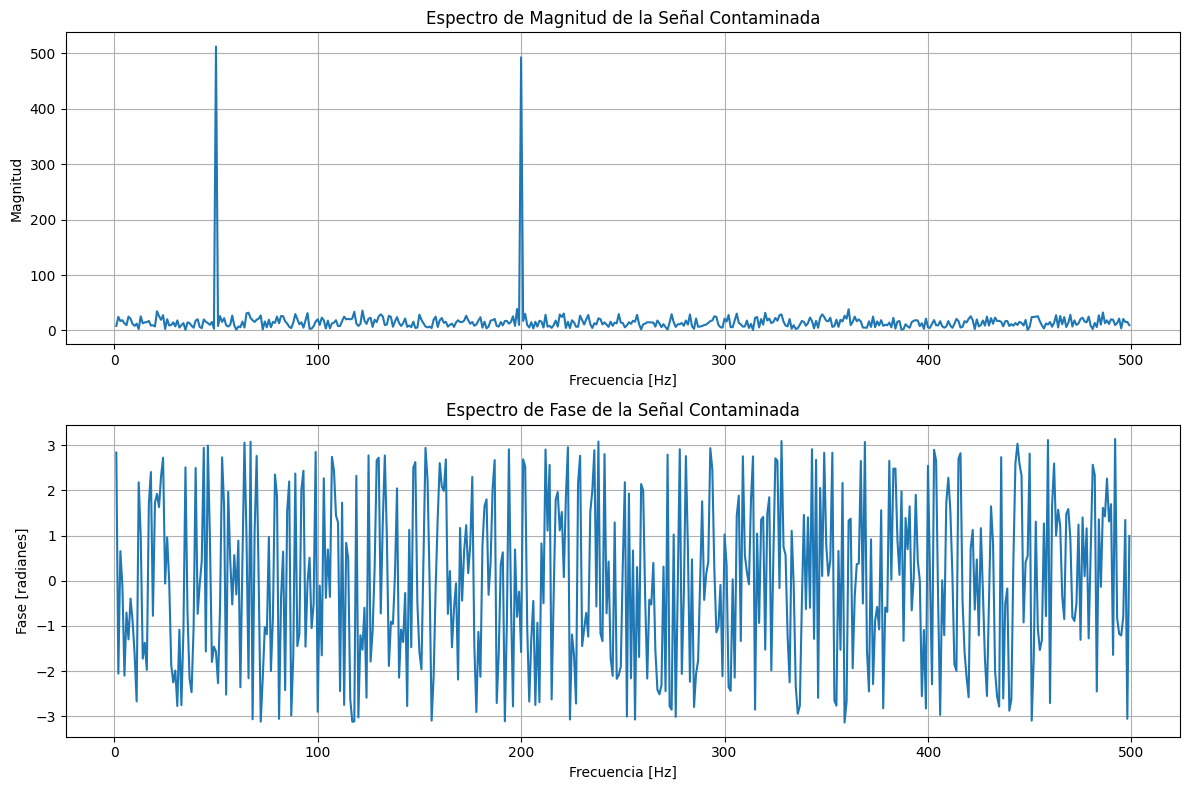

In [278]:
# Solo la mitad positiva del espectro
mask = freq > 0

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(freq[mask], magnitude[mask])
plt.title('Espectro de Magnitud de la Señal Contaminada')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(freq[mask], phase[mask])
plt.title('Espectro de Fase de la Señal Contaminada')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [radianes]')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Diseño de Filtros para Limpiar la Señal Contaminada

Filtro de Rechazo de Banda (Notch Filter)

Filtro FIR de Rechazo de Banda

In [279]:
# Diseño del filtro FIR de rechazo de banda
from scipy.signal import firwin

# Frecuencias de corte normalizadas
f_lower = 190  # Frecuencia inferior de corte en Hz
f_upper = 210  # Frecuencia superior de corte en Hz
nyq = fs / 2   # Frecuencia de Nyquist

numtaps = 201  # Número de coeficientes del filtro FIR
fir_notch = firwin(numtaps, [f_lower / nyq, f_upper / nyq], pass_zero='bandstop')

Filtro IIR de Rechazo de Banda

In [280]:
# Diseño del filtro IIR de rechazo de banda (Notch)
from scipy.signal import iirnotch

Q = 30  # Factor de calidad
iir_notch_b, iir_notch_a = iirnotch(f_interf / nyq, Q)

#### Filtro Pasa-Banda

Filtro FIR Pasa-Banda

In [281]:
# Diseño del filtro FIR pasa-banda
f_pass_lower = 45
f_pass_upper = 55
fir_bandpass = firwin(numtaps, [f_pass_lower / nyq, f_pass_upper / nyq], pass_zero=False)

Filtro IIR Pasa-Banda

In [282]:
# Diseño del filtro IIR pasa-banda
order = 4
iir_bandpass_b, iir_bandpass_a = iirfilter(order, [f_pass_lower / nyq, f_pass_upper / nyq], btype='band', ftype='butter')

#### Análisis del Espectro de los Filtros Diseñados

In [283]:
# Función para graficar la respuesta en frecuencia
def plot_filter_response(b, a=1, title=''):
    w, h = freqz(b, a, worN=8000)
    f = w * fs / (2 * np.pi)
    plt.plot(f, 20 * np.log10(abs(h)), label=title)

#### Gráficas de las Respuestas en Frecuencia


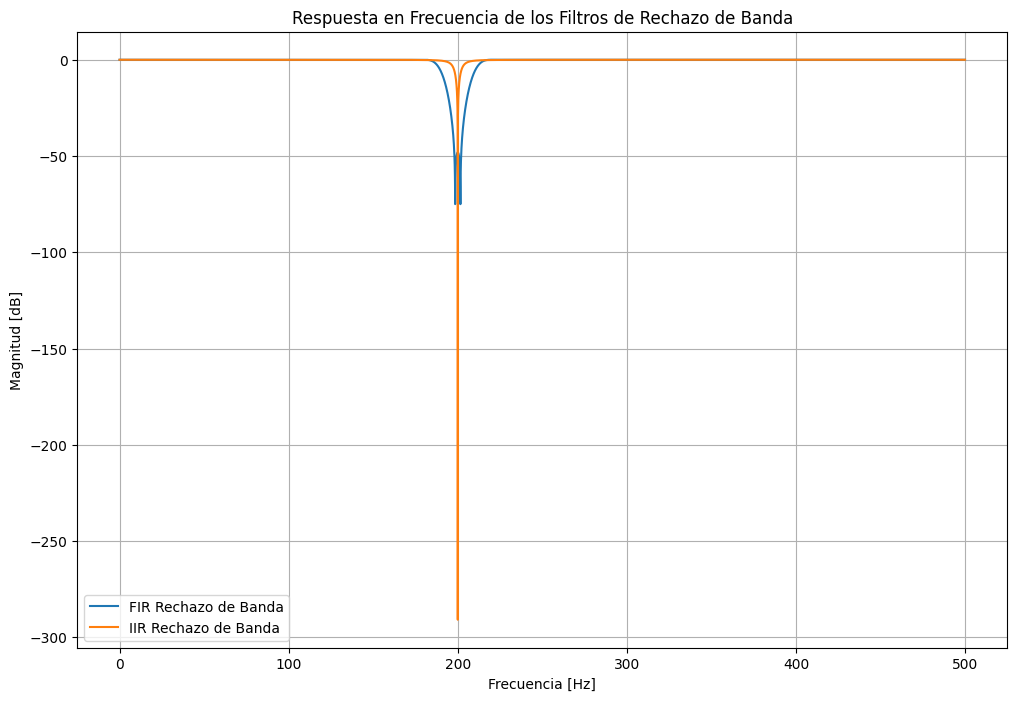

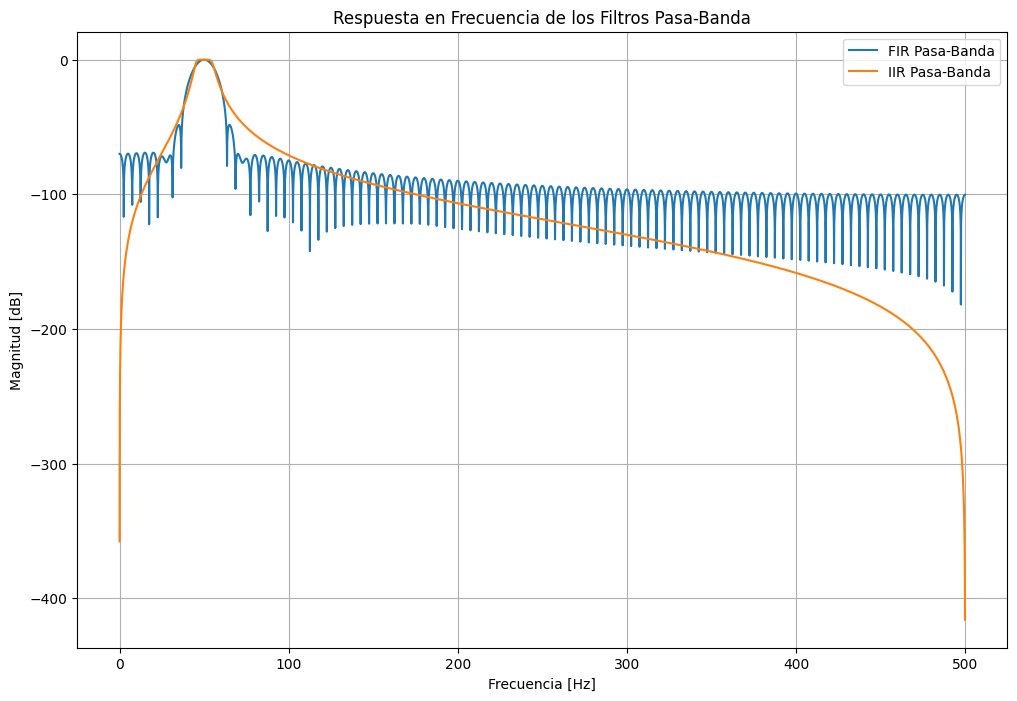

In [284]:
plt.figure(figsize=(12, 8))

# Filtro FIR de rechazo de banda
plot_filter_response(fir_notch, title='FIR Rechazo de Banda')

# Filtro IIR de rechazo de banda
plot_filter_response(iir_notch_b, iir_notch_a, title='IIR Rechazo de Banda')

plt.title('Respuesta en Frecuencia de los Filtros de Rechazo de Banda')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

# Filtro FIR pasa-banda
plot_filter_response(fir_bandpass, title='FIR Pasa-Banda')

# Filtro IIR pasa-banda
plot_filter_response(iir_bandpass_b, iir_bandpass_a, title='IIR Pasa-Banda')

plt.title('Respuesta en Frecuencia de los Filtros Pasa-Banda')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.legend()
plt.grid(True)
plt.show()


### Aplicación y Comparación de Resultados

In [285]:
import numpy as np
import matplotlib.pyplot as plt

def DFT(x):
    N = len(x)
    x = np.asarray(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    exponent = -2j * np.pi * k * n / N
    W = np.exp(exponent)
    X = np.dot(W, x)
    return X

def IDFT(X):
    N = len(X)
    X = np.asarray(X)
    k = np.arange(N)
    n = k.reshape((N, 1))
    exponent = 2j * np.pi * k * n / N
    W = np.exp(exponent)
    x = np.dot(W, X) / N
    return x.real  # Retornamos solo la parte real


Función para Aplicar el Filtro en el Dominio de la Frecuencia

In [286]:
def compute_impulse_response(b, a, N):
    impulse = np.zeros(N)
    impulse[0] = 1  # Impulso unitario
    response = np.zeros(N)
    for n in range(N):
        response[n] += b[0] * impulse[n]
        for i in range(1, len(b)):
            if n - i >= 0:
                response[n] += b[i] * impulse[n - i]
        for j in range(1, len(a)):
            if n - j >= 0:
                response[n] -= a[j] * response[n - j]
    return response


Aplicación de los Filtros de Rechazo de Banda

FIR

In [287]:
# Longitud de la señal y del filtro FIR
N = len(contaminated_signal)
M_fir_notch = len(fir_notch)

# Longitud necesaria para la convolución lineal
L = N + M_fir_notch - 1

# Zero-padding de la señal y del filtro a longitud L
signal_padded = np.zeros(L)
signal_padded[:N] = contaminated_signal

fir_notch_padded = np.zeros(L)
fir_notch_padded[:M_fir_notch] = fir_notch

# DFT de la señal y del filtro
signal_fft = DFT(signal_padded)
fir_notch_fft = DFT(fir_notch_padded)

# Multiplicación punto a punto en el dominio de la frecuencia
filtered_fir_notch_fft = signal_fft * fir_notch_fft

# IDFT para obtener la señal filtrada
filtered_fir_notch_full = IDFT(filtered_fir_notch_fft)

# Tomamos los primeros N puntos de la señal filtrada
filtered_fir_notch = filtered_fir_notch_full[:N]

IIR

In [288]:
# Longitud de la respuesta al impulso
K_iir_notch = N  # Podemos establecer K igual a N

# Respuesta al impulso del filtro IIR
impulse_response_iir_notch = compute_impulse_response(iir_notch_b, iir_notch_a, K_iir_notch)

# Longitud necesaria para la convolución lineal
L = N + K_iir_notch - 1

# Zero-padding de la señal y de la respuesta al impulso
signal_padded = np.zeros(L)
signal_padded[:N] = contaminated_signal

impulse_response_iir_notch_padded = np.zeros(L)
impulse_response_iir_notch_padded[:K_iir_notch] = impulse_response_iir_notch

# DFT de la señal y de la respuesta al impulso
signal_fft = DFT(signal_padded)
iir_notch_fft = DFT(impulse_response_iir_notch_padded)

# Multiplicación punto a punto en el dominio de la frecuencia
filtered_iir_notch_fft = signal_fft * iir_notch_fft


# IDFT para obtener la señal filtrada
filtered_iir_notch_full = IDFT(filtered_iir_notch_fft)

# Tomamos los primeros N puntos de la señal filtrada
filtered_iir_notch = filtered_iir_notch_full[:N]

Aplicación de los Filtros Pasa-Banda

FIR 

In [289]:
# Longitud del filtro FIR pasa-banda
M_fir_bandpass = len(fir_bandpass)

# Longitud necesaria para la convolución lineal
L = N + M_fir_bandpass - 1

# Zero-padding de la señal y del filtro
signal_padded = np.zeros(L)
signal_padded[:N] = contaminated_signal

fir_bandpass_padded = np.zeros(L)
fir_bandpass_padded[:M_fir_bandpass] = fir_bandpass

# DFT de la señal y del filtro
signal_fft = DFT(signal_padded)
fir_bandpass_fft = DFT(fir_bandpass_padded)

# Multiplicación en el dominio de la frecuencia
filtered_fir_bandpass_fft = signal_fft * fir_bandpass_fft

# IDFT para obtener la señal filtrada
filtered_fir_bandpass_full = IDFT(filtered_fir_bandpass_fft)

# Tomamos los primeros N puntos de la señal filtrada
filtered_fir_bandpass = filtered_fir_bandpass_full[:N]


IIR 

In [290]:
# Longitud de la respuesta al impulso
K_iir_bandpass = N  # Establecemos K igual a N

# Respuesta al impulso del filtro IIR
impulse_response_iir_bandpass = compute_impulse_response(iir_bandpass_b, iir_bandpass_a, K_iir_bandpass)

# Longitud necesaria para la convolución lineal
L = N + K_iir_bandpass - 1

# Zero-padding de la señal y de la respuesta al impulso
signal_padded = np.zeros(L)
signal_padded[:N] = contaminated_signal

impulse_response_iir_bandpass_padded = np.zeros(L)
impulse_response_iir_bandpass_padded[:K_iir_bandpass] = impulse_response_iir_bandpass

# DFT de la señal y de la respuesta al impulso
signal_fft = DFT(signal_padded)
iir_bandpass_fft = DFT(impulse_response_iir_bandpass_padded)

# Multiplicación en el dominio de la frecuencia
filtered_iir_bandpass_fft = signal_fft * iir_bandpass_fft

# IDFT para obtener la señal filtrada
filtered_iir_bandpass_full = IDFT(filtered_iir_bandpass_fft)

# Tomamos los primeros N puntos de la señal filtrada
filtered_iir_bandpass = filtered_iir_bandpass_full[:N]


### Gráficas y Comparación de Resultados

In [291]:
# Señal original (sin contaminación)
original_signal = np.sin(2 * np.pi * f_signal * t)

# DFT de la señal original
original_signal_fft = DFT(original_signal)

# Frecuencias
freq = np.fft.fftfreq(N, d=1/fs)
mask = freq >= 0

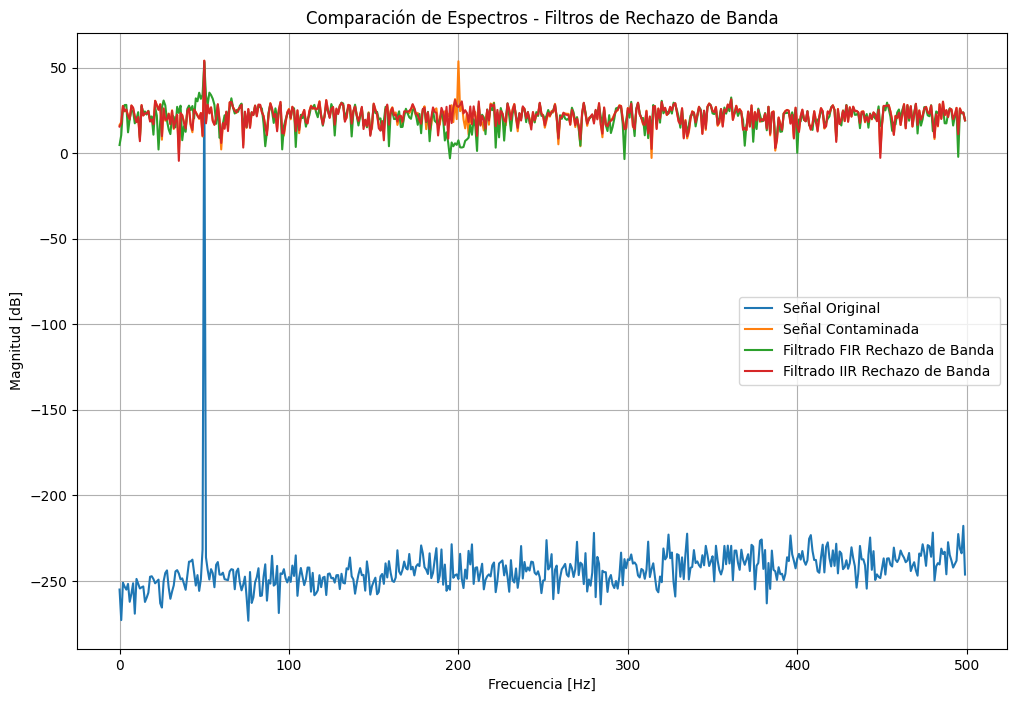

In [292]:
# DFT de la señal original
original_signal_fft = DFT(signal[:N])  # Aseguramos que tenga longitud N

# Frecuencias
freq = np.fft.fftfreq(N, d=1/fs)
mask = freq >= 0

plt.figure(figsize=(12, 8))

# Espectro de la señal original
plt.plot(freq[mask], 20 * np.log10(np.abs(original_signal_fft[mask])), label='Señal Original')

# Espectro de la señal contaminada
signal_fft_full = DFT(contaminated_signal)
plt.plot(freq[mask], 20 * np.log10(np.abs(signal_fft_full[mask])), label='Señal Contaminada')

# Espectro de la señal filtrada con FIR
filtered_fir_notch_fft = DFT(filtered_fir_notch)
plt.plot(freq[mask], 20 * np.log10(np.abs(filtered_fir_notch_fft[mask])), label='Filtrado FIR Rechazo de Banda')

# Espectro de la señal filtrada con IIR
filtered_iir_notch_fft = DFT(filtered_iir_notch)
plt.plot(freq[mask], 20 * np.log10(np.abs(filtered_iir_notch_fft[mask])), label='Filtrado IIR Rechazo de Banda')

plt.title('Comparación de Espectros - Filtros de Rechazo de Banda')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.legend()
plt.grid(True)
plt.show()


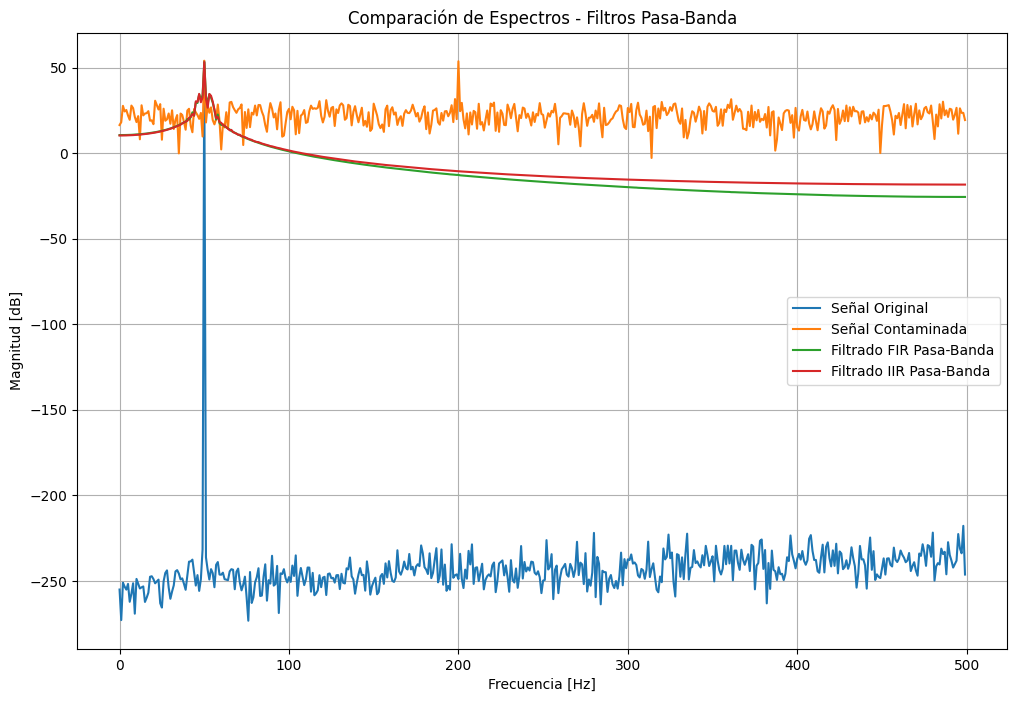

In [293]:
plt.figure(figsize=(12, 8))

# Espectro de la señal original
plt.plot(freq[mask], 20 * np.log10(np.abs(original_signal_fft[mask])), label='Señal Original')

# Espectro de la señal contaminada
plt.plot(freq[mask], 20 * np.log10(np.abs(signal_fft_full[mask])), label='Señal Contaminada')

# Espectro de la señal filtrada con FIR
filtered_fir_bandpass_fft = DFT(filtered_fir_bandpass)
plt.plot(freq[mask], 20 * np.log10(np.abs(filtered_fir_bandpass_fft[mask])), label='Filtrado FIR Pasa-Banda')

# Espectro de la señal filtrada con IIR
filtered_iir_bandpass_fft = DFT(filtered_iir_bandpass)
plt.plot(freq[mask], 20 * np.log10(np.abs(filtered_iir_bandpass_fft[mask])), label='Filtrado IIR Pasa-Banda')

plt.title('Comparación de Espectros - Filtros Pasa-Banda')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.legend()
plt.grid(True)
plt.show()


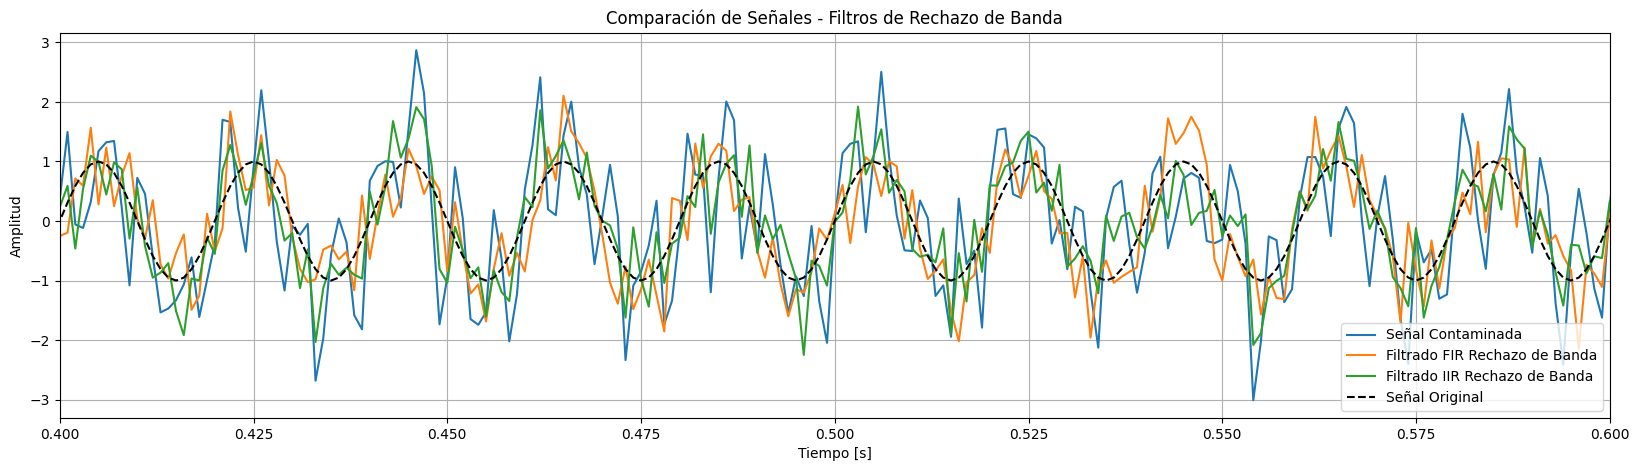

In [294]:
plt.figure(figsize=(20, 5))

plt.plot(t, contaminated_signal, label='Señal Contaminada')
plt.plot(t, filtered_fir_notch, label='Filtrado FIR Rechazo de Banda')
plt.plot(t, filtered_iir_notch, label='Filtrado IIR Rechazo de Banda')
plt.plot(t, original_signal, 'k--', label='Señal Original')

plt.title('Comparación de Señales - Filtros de Rechazo de Banda')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0.4, 0.6)
plt.legend()
plt.grid(True)
plt.show()


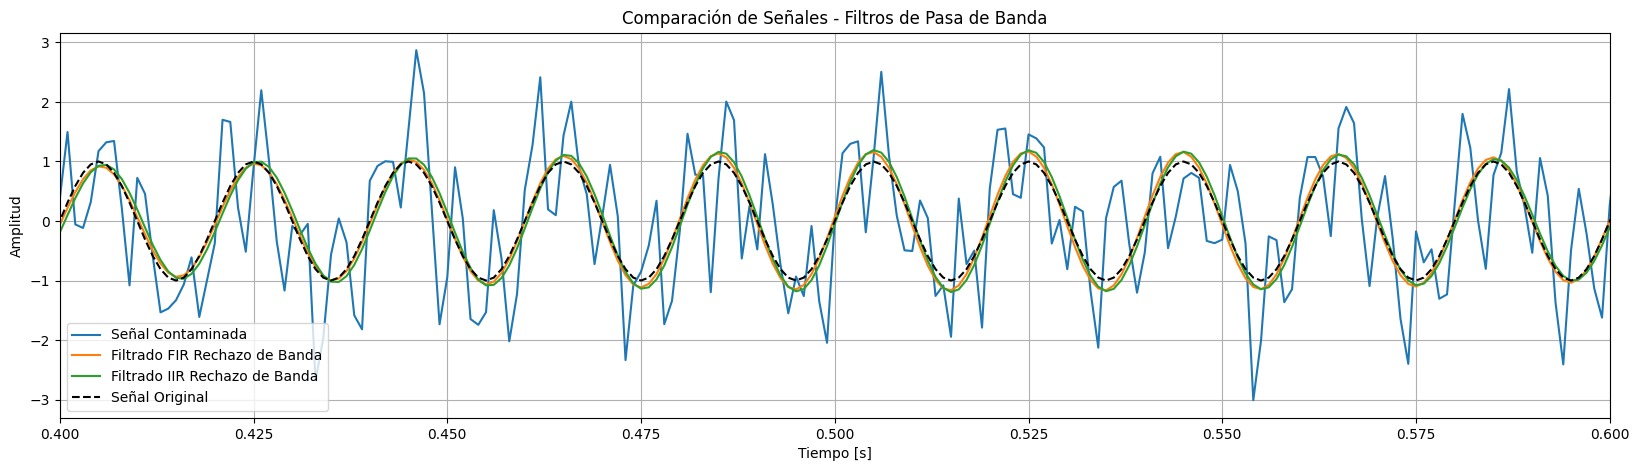

In [295]:
plt.figure(figsize=(20, 5))

plt.plot(t, contaminated_signal, label='Señal Contaminada')
plt.plot(t, filtered_fir_bandpass, label='Filtrado FIR Rechazo de Banda')
plt.plot(t, filtered_iir_bandpass, label='Filtrado IIR Rechazo de Banda')
plt.plot(t, original_signal, 'k--', label='Señal Original')

plt.title('Comparación de Señales - Filtros de Pasa de Banda')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0.4, 0.6)
plt.legend()
plt.grid(True)
plt.show()
